#### A/B TESTING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy.random as npr

In [3]:
df=pd.read_csv("C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Data_Science\\Asgn_1\\psi.csv")
df1=df[["team","delta"]]
df1

,team,delta
0,Patriots,-1.00
1,Patriots,-1.65
2,Patriots,-1.35
3,Patriots,-1.80
4,Patriots,-1.40
5,Patriots,-0.90
6,Patriots,-0.65
7,Patriots,-1.40
8,Patriots,-1.55
9,Patriots,-2.00


In [4]:
df1.shape

(30, 2)

In [5]:
df2=df1.copy(deep=True)
df2.loc[:,"shuffled"]=df2["delta"].sample(frac=1).values
df2

,team,delta,shuffled
0,Patriots,-1.00,-1.40
1,Patriots,-1.65,-1.15
2,Patriots,-1.35,-0.50
3,Patriots,-1.80,-0.20
4,Patriots,-1.40,-1.15
5,Patriots,-0.90,-0.45
6,Patriots,-0.65,-0.90
7,Patriots,-1.40,-0.25
8,Patriots,-1.55,-1.80
9,Patriots,-2.00,-1.40


In [6]:
mean1=df2["delta"][df2["team"]=="Patriots"].mean()-df2["delta"][df2["team"]=="Colts"].mean()
mean1

-0.7335227272727272

In [7]:
mean2=[]

for i in range(1000):
    df3=df1.copy(deep=True)

    df3.loc[:,"shuffled"]=df3["delta"].sample(frac=1).values
    mean2.append(df3["shuffled"][df2["team"]=="Patriots"].mean()-df3["shuffled"][df2["team"]=="Colts"].mean())
mean2 

[0.11022727272727251,
 0.22954545454545439,
 0.10170454545454544,
 -0.4011363636363635,
 0.0420454545454545,
 0.30625,
 0.04204545454545472,
 0.30625,
 0.36590909090909085,
 -0.2647727272727274,
 -0.5289772727272725,
 -0.034659090909090806,
 0.05909090909090908,
 0.15284090909090897,
 0.15284090909090897,
 -0.060227272727272796,
 -0.6227272727272729,
 0.28068181818181814,
 -0.14545454545454528,
 0.11022727272727284,
 0.13579545454545439,
 -0.27329545454545456,
 -0.1539772727272728,
 -0.0431818181818181,
 -0.2306818181818182,
 0.3232954545454546,
 -0.17102272727272716,
 -0.3329545454545453,
 -0.009090909090908816,
 -0.034659090909090806,
 0.00795454545454577,
 -0.009090909090909038,
 0.23806818181818168,
 0.16136363636363638,
 -0.27329545454545456,
 0.04204545454545483,
 -0.29034090909090926,
 -0.07727272727272738,
 -0.07727272727272705,
 0.08465909090909118,
 -0.2562500000000001,
 0.06761363636363649,
 -0.15397727272727257,
 0.561931818181818,
 -0.07727272727272716,
 0.2125000000000000

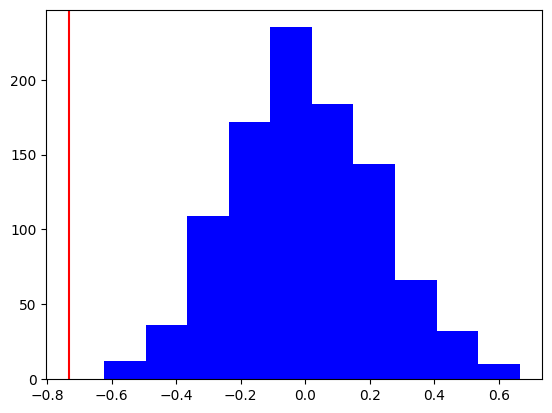

In [8]:
plt.hist(mean2,color="blue")
plt.axvline(mean1,color="red")

#### Random Sampling

0.7588805166846071


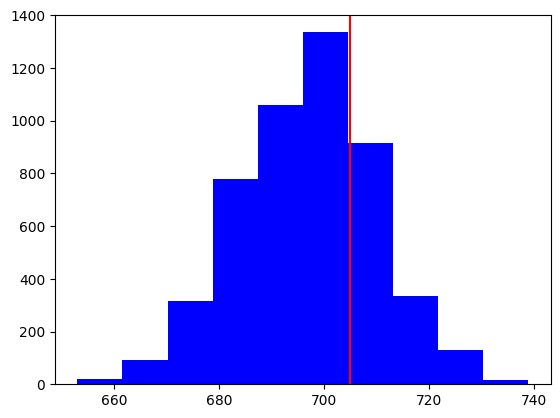

Outcome: Fail to reject the null hypothesis. Mendel's model is supported.


In [9]:
total =929   #at one instance or at one sample total value
observed=705    ##at one instance or at one sample alternate hypothesis oda no of purple
null_ratio=0.75 #null hypothesis la ithuthaan naa solra actual ratio for eg. in mendel question is 3:1 so 75% thaan null ratio
ratio=observed/total 
print(ratio)  #this ratio va thaan we must check if it is random or due to some actual law of universe so this is red color
no_of_samples=5000

simulation_arr=npr.binomial(total,null_ratio,no_of_samples)

plt.hist(simulation_arr,color="blue")
plt.axvline(observed,color="red")
plt.show()

#red is within blue so null hypothesis selected cuz 705 varathu satharanam in 5000 times it came manu but ithe 740 means then its doubtful
p_value = (simulation_arr>= observed).mean()

if p_value > 0.05:
    print("Outcome: Fail to reject the null hypothesis. Mendel's model is supported.")
else:
    print("Outcome: Reject the null hypothesis. Mendel's model is not supported.")

In [10]:
import math
from scipy import stats

def hypothesis_test(pop_mean, sample_mean, sample_size, alpha, std_deviation):
    # Z
    z_stat = (sample_mean - pop_mean) / (std_deviation / math.sqrt(sample_size))

    #critical value
    critical_value = stats.norm.ppf(1 - alpha / 2) 

    if abs(z_stat) > critical_value:
        print("Method 1 - Critical Value: Reject the null hypothesis. There is a significant difference between the two groups.")
    else:
        print("Method 1 - Critical Value: Fail to reject the null hypothesis. There is no significant difference between the two groups.")

    #  p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  

    if p_value < alpha:
        print("Method 2 - P-Value: Reject the null hypothesis. There is a significant difference between the two groups.")
    else:
        print("Method 2 - P-Value: Fail to reject the null hypothesis. There is no significant difference between the two groups.")

std_deviation = 13.46
pop_mean = 60
sample_mean = 65.10
sample_size = 40
alpha = 0.05

hypothesis_test(pop_mean, sample_mean, sample_size, alpha, std_deviation)

sample_size1 = 25
sample_mean1 = 62
alpha1 = 0.01


hypothesis_test(pop_mean, sample_mean1, sample_size1, alpha1, std_deviation)


Method 1 - Critical Value: Reject the null hypothesis. There is a significant difference between the two groups.
Method 2 - P-Value: Reject the null hypothesis. There is a significant difference between the two groups.
Method 1 - Critical Value: Fail to reject the null hypothesis. There is no significant difference between the two groups.
Method 2 - P-Value: Fail to reject the null hypothesis. There is no significant difference between the two groups.
